# Problem Statement:
Here we want to predict the price  of a house given some features like the size and the location of the house.

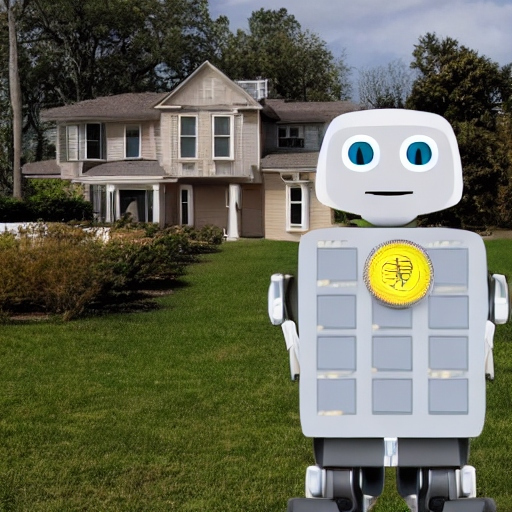

* This image was generated using dall-e 2 by rephrasing the problem statement.

# Importing the libraries:

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Other libraries will be imported once needed.

# Importing the data:

In [2]:
df = pd.read_csv('../../../Study/Data Science/Datasets/house_prices_data.csv')

# Exploring the data:

In [3]:
df.head()

,0,2009,21,9,6,84,121,14264
0,1,2007,4,2,3,86,121,12032
1,2,2016,18,3,7,90,120,13560
2,3,2002,13,2,2,80,128,12029
3,4,2014,25,5,8,81,122,14157
4,5,2008,11,9,3,88,126,14287


* Note that the headers are not there, and the index is redundant, so let's fix those two issues:

In [4]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df.columns=column_names
df.set_index('serial', inplace=True)

In [5]:
df.head()

,date,age,distance,stores,latitude,longitude,price
serial,,,,,,,
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
5,2008,11,9,3,88,126,14287


In [6]:
df.describe(include='all')

,date,age,distance,stores,latitude,longitude,price
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2008.912783,18.944589,4.976995,4.914783,84.971594,124.994999,13906.567113
std,5.458123,11.330635,3.199651,3.143166,3.162277,3.167805,1020.864472
min,2000.000000,0.000000,0.000000,0.000000,80.000000,120.000000,11263.000000
25%,2004.000000,9.000000,2.000000,2.000000,82.000000,122.000000,13197.500000
50%,2009.000000,19.000000,5.000000,5.000000,85.000000,125.000000,13893.000000
75%,2014.000000,29.000000,8.000000,8.000000,88.000000,128.000000,14614.000000
max,2018.000000,38.000000,10.000000,10.000000,90.000000,130.000000,16964.000000


In [7]:
# checking for missing data:
df.isnull().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

<AxesSubplot:>

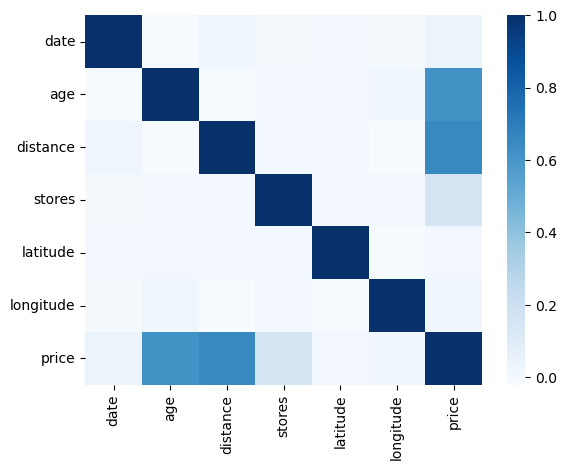

In [8]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='Blues')

# Normalizing The Data:

In [60]:
x_mean = df.mean()
x_std = df.std()

In [59]:
x = df.iloc[:,0:6] # Using all the features
x = (x-x.mean())/x.std()

In [ ]:
y = df.iloc[:,-1]
y = (y-y.mean())/y.std()

# Converting the data to numpy arrays:

In [24]:
# using only the good correlated features with price from the df.corr():
x = x.to_numpy()
x

array([[-3.50446924e-01, -1.31895426e+00, -9.30412559e-01,
        -6.09189293e-01,  3.25210540e-01, -1.26112526e+00],
       [ 1.29847146e+00, -8.33659314e-02, -6.17878465e-01,
         6.63412995e-01,  1.59012203e+00, -1.57680125e+00],
       [-1.26651269e+00, -5.24647476e-01, -9.30412559e-01,
        -9.27339865e-01, -1.57215669e+00,  9.48606663e-01],
       ...,
       [ 1.48168461e+00, -1.14244164e+00,  1.56986019e+00,
         2.71118511e-02,  1.59012203e+00,  1.57869568e-03],
       [ 1.99192536e-01,  1.59350394e+00, -6.17878465e-01,
         2.71118511e-02, -1.25592882e+00,  9.48606663e-01],
       [ 1.66489776e+00, -8.77672712e-01, -1.24294665e+00,
         1.29971414e+00,  1.59012203e+00,  6.32930674e-01]])

In [25]:
y = y.to_numpy()
y

array([-1.83625463, -0.33948396, -1.83919332, ...,  0.19143862,
        0.39812619, -1.11333791])

In [26]:
print(f'X data shape: {x.shape}, Y data shape: {y.shape}')

X data shape: (4999, 6), Y data shape: (4999,)


# Splitting the data into training/de sets (95,5):

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(x,y,test_size=0.05)

print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_dev shape: {x_dev.shape}, y_dev shape: {y_dev.shape}')

x_train shape: (4749, 6), y_train shape: (4749,)
x_dev shape: (250, 6), y_dev shape: (250,)


# Creating the model:

In [41]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(units=10, input_shape=(6,), activation='relu'),
                            tf.keras.layers.Dense(units=1, activation='linear')
                            ])

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                70        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(),
             )

In [44]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

pred_on_unseen = model.predict(x_dev)

history = model.fit(
                    x_train, y_train,
                    validation_data= (x_dev, y_dev),
                    epochs=100,
                    callbacks=[es_cb]
                    )

8/8 [==============================] - 0s 1ms/step
Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 0.6898 - val_loss: 0.3488
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.2511 - val_loss: 0.1906
Epoch 3/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1837 - val_loss: 0.1691
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1715 - val_loss: 0.1622
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1656 - val_loss: 0.1603
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1621 - val_loss: 0.1586
Epoch 7/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1595 - val_loss: 0.1605
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1581 - val_loss: 0.1589
Epoch 9/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1566 - val_loss: 0.1600
Epoch 10/100
149/149 [==================

# Plotting The Loss:

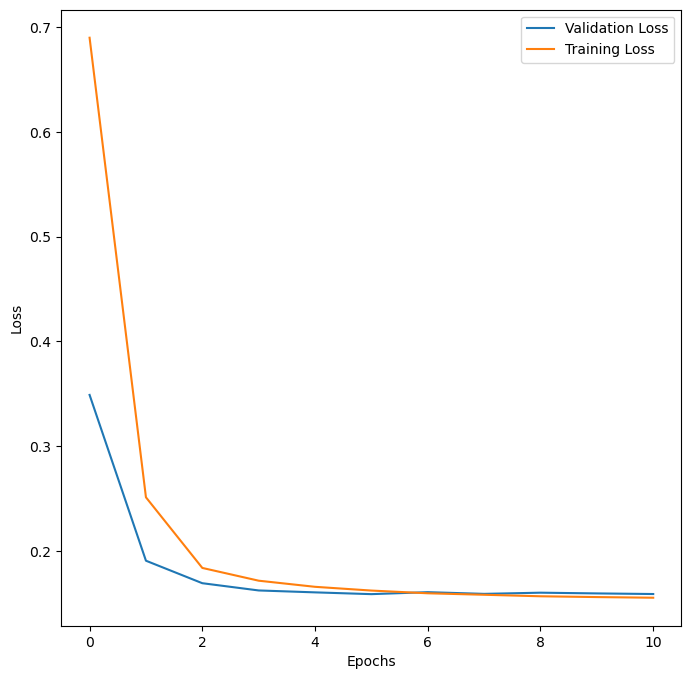

In [45]:
h = history.history
x_lim = len(h['loss'])
plt.figure(figsize=(8, 8))
plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting predictions:

In [50]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(5, 5))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

8/8 [==============================] - 0s 1ms/step


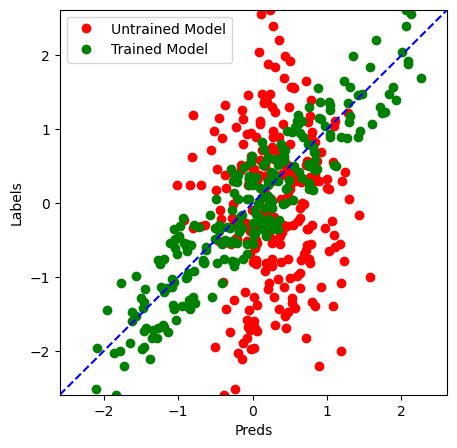

In [51]:
pred_on_trained = model.predict(x_dev)
compare_predictions(pred_on_unseen, pred_on_trained, y_dev)